<a href="https://colab.research.google.com/github/tuanlym/DOANII/blob/main/Train_padded140.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras
!pip install pyvi
!pip install pandas
!pip install numpy
!pip install gensim

     |████████████████████████████████| 8.5 MB 10.5 MB/s 
     |████████████████████████████████| 743 kB 39.3 MB/s 


In [2]:
import gensim, re
import numpy as np
import pandas as pd
import pickle
from os import listdir

from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import sys
import os
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from keras.regularizers import l1
from keras.layers import Activation
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Embedding, Dropout, Flatten
from pyvi import ViTokenizer
from keras.preprocessing.text import Tokenizer
from gensim.parsing.preprocessing import strip_non_alphanum, strip_multiple_whitespaces,preprocess_string, split_alphanum, strip_short, strip_numeric

In [3]:
stop_word = ['bị', 'bởi', 'cả', 'các', 'cái', 'cần', 'càng', 'chỉ', 'chiếc', 'cho', 'chứ', 'chưa', 'chuyện', 'có', 'có_thể', 'cứ', 'của', 'cùng', 'cũng', 'đã', 'đang', 'đây', 'để', 'đến_nỗi', 'đều', 'điều', 'do', 'đó', 'được', 'dưới', 'gì', 'khi', 'không', 'là', 'lại', 'lên', 'lúc', 'mà', 'mỗi', 'một_cách', 'này', 'nên', 'nếu', 'ngay', 'nhiều', 'như', 'nhưng', 'những', 'nơi', 'nữa', 'phải', 'qua', 'ra', 'rằng', 'rằng', 'rất', 'rất', 'rồi', 'sau', 'sẽ', 'so', 'sự', 'tại', 'theo', 'thì', 'trên', 'trước', 'từ', 'từng', 'và', 'vẫn', 'vào', 'vậy', 'vì', 'việc', 'với', 'vừa', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']

In [4]:
def clean_document(raw):
    raw = ViTokenizer.tokenize(raw)
    raw = strip_non_alphanum(raw).lower().strip()
    raw = split_alphanum(raw)
    raw = strip_short(raw, minsize=2)
    raw = strip_numeric(raw)
    tokens = raw.split()
    return tokens

In [5]:
def remove_stopwords(line):
    words = []
    for word in line.strip().split():
        if word not in stop_word:
            words.append(word)
    return ' '.join(words)
    return line

In [6]:
document = []
with open('/content/drive/MyDrive/DOANII /train_sents.txt','r') as f:
  data = f.readlines()
for d in data:
    document.append(d)
with open('/content/drive/MyDrive/DOANII /test_sents.txt','r') as f:
  data = f.readlines()
for d in data:
    document.append(d)
len(document)

14592

In [7]:
labels_data = []
with open('/content/drive/MyDrive/DOANII /train_sentiments.txt','r') as f:
  label_train = f.readlines()
for line in label_train:
  labels_data.append(line.strip())
with open('/content/drive/MyDrive/DOANII /test_sentiments.txt','r') as f:
  label_train = f.readlines()
for line in label_train:
  labels_data.append(line.strip())
len(labels_data)

14592

In [8]:
sentences = []
for d in document:
  d = ViTokenizer.tokenize(d)
  d = remove_stopwords(d)
  sentences.append(clean_document(d))
#sentences


In [9]:
labels = []
for i in range(0,len(labels_data)):
  if labels_data[i] == '0':
     labels.append((1,0,0))
  elif labels_data[i] == '1':
     labels.append((0,1,0))
  else:
     labels.append((0,0,1))
labels = pd.get_dummies(labels)
labels

,"(0, 0, 1)","(0, 1, 0)","(1, 0, 0)"
0,1,0,0
1,1,0,0
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
14587,0,0,1
14588,1,0,0
14589,1,0,0
14590,0,0,1


In [10]:
x_train, x_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.3, shuffle=True)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


In [11]:
word_model = gensim.models.Word2Vec(x_train, size=300, window = 10, min_count=1, iter=10)

In [12]:
word_model.wv.save_word2vec_format('/content/drive/MyDrive/DOANII /vnw2v.txt', fvocab=None, binary=False)


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^`{|}~ ')
tokenizer.fit_on_texts(x_train)
tokenizer.word_index


{'thầy': 1,
 'sinh_viên': 2,
 'dạy': 3,
 'nhiệt_tình': 4,
 'hiểu': 5,
 'giảng_viên': 6,
 'học': 7,
 'dễ': 8,
 'cô': 9,
 'bài': 10,
 'giảng': 11,
 'bài_tập': 12,
 'giảng_dạy': 13,
 'hơn': 14,
 'em': 15,
 'hay': 16,
 'kiến_thức': 17,
 'trong': 18,
 'thực_hành': 19,
 'tốt': 20,
 'môn_học': 21,
 'làm': 22,
 'quá': 23,
 'về': 24,
 'lớp': 25,
 'khó': 26,
 'tận_tâm': 27,
 'giờ': 28,
 'truyền_đạt': 29,
 'cách': 30,
 'giáo_viên': 31,
 'hơi': 32,
 'đến': 33,
 'thời_gian': 34,
 'còn': 35,
 'tận_tình': 36,
 'nội_dung': 37,
 'lý_thuyết': 38,
 'thêm': 39,
 'nói': 40,
 'phòng': 41,
 'một': 42,
 'môn': 43,
 'hướng_dẫn': 44,
 'vui_tính': 45,
 'đúng': 46,
 'buổi': 47,
 'phần': 48,
 'slide': 49,
 'lên_lớp': 50,
 'thi': 51,
 'khá': 52,
 'học_sinh': 53,
 'nhanh': 54,
 'tài_liệu': 55,
 'vui_vẻ': 56,
 'giúp': 57,
 'đi': 58,
 'điểm': 59,
 'thực_tế': 60,
 'ví_dụ': 61,
 'hiệu_quả': 62,
 'ít': 63,
 'wzjwz': 64,
 'đồ_án': 65,
 'tạo': 66,
 'đầy_đủ': 67,
 'mới': 68,
 'luôn': 69,
 'phương_pháp': 70,
 'tiếp_thu': 71,

In [15]:
padded_x_train = tokenizer.texts_to_sequences(x_train)
padded_x_train = pad_sequences(padded_x_train, maxlen = 140)
padded_x_train.shape

(10214, 140)

In [18]:
padded_x_test = tokenizer.texts_to_sequences(x_test)
padded_x_test = pad_sequences(padded_x_test, maxlen = 140)
padded_x_test.shape

(4378, 140)

In [19]:
padded_x_train.shape[1]

140

In [20]:
len(word_model.wv.vocab)

3176

In [21]:
 enumerate(word_model.wv.vectors)

In [22]:
padded_x_train = np.array(padded_x_train)
y_train = np.array(y_train)
padded_x_test = np.array(padded_x_test)
y_test = np.array(y_test)

In [23]:
embedding_matrix = np.zeros((len(word_model.wv.vocab) + 1, 300))
for i, vec in enumerate(word_model.wv.vectors):
  embedding_matrix[i] = vec
model = Sequential()
model.add(Embedding(len(word_model.wv.vocab) +1,300,input_length=padded_x_train.shape[1],weights=[embedding_matrix],trainable=False))
model.add(LSTM(300,return_sequences=False))
model.add(Dense(3,activation="softmax"))
model.summary()
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['acc'])
batch = 64
epochs = 30
history = model.fit(padded_x_train,y_train,batch,epochs,  validation_data=(padded_x_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 140, 300)          953100    
                                                                 
 lstm (LSTM)                 (None, 300)               721200    
                                                                 
 dense (Dense)               (None, 3)                 903       
                                                                 
Total params: 1,675,203
Trainable params: 722,103
Non-trainable params: 953,100
_________________________________________________________________
Epoch 1/30
160/160 [==============================] - 174s 1s/step - loss: 0.7337 - acc: 0.6496 - val_loss: 0.6835 - val_acc: 0.6868
Epoch 2/30
160/160 [==============================] - 170s 1s/step - loss: 0.6215 - acc: 0.7218 - val_loss: 0.6087 - val_acc: 0.7405
Epoch 3/30
160/160 [====================

In [24]:
!pip install matplotlib

In [25]:
import matplotlib.pyplot as plt

In [26]:
test_sen = ["mình ghét môn tiếng anh"]
test_seq = tokenizer.texts_to_sequences(test_sen)
padded_test_seq = pad_sequences(test_seq, maxlen = 140)
padded_test_seq

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,  124, 2211,   43,   77,   76]], dtype=int32)

In [27]:
model.predict(padded_test_seq)

array([[0.01374889, 0.08619604, 0.9000551 ]], dtype=float32)

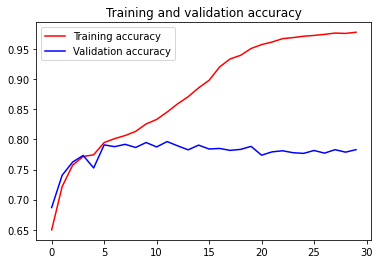

<Figure size 432x288 with 0 Axes>

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

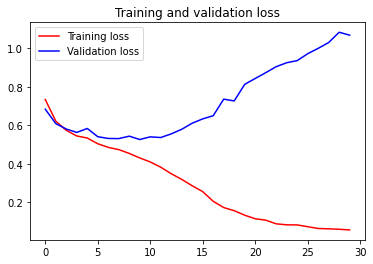

<Figure size 432x288 with 0 Axes>

In [29]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [31]:
y_pred = model.predict(padded_x_test, batch_size=50)
labels = ['Tiêu cực', 'Trung tính', 'Tích cực']

In [33]:
predY = []
testY = []
for i in range(2000):
  y_p = np.argmax(y_pred[i])
  y_t = np.argmax(y_test[i])
  predY.append(y_p)
  testY.append(y_t)

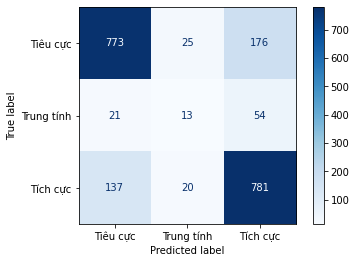

In [34]:
cm = confusion_matrix(testY, predY)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [35]:
print(classification_report(testY, predY, target_names=labels))

              precision    recall  f1-score   support

    Tiêu cực       0.83      0.79      0.81       974
  Trung tính       0.22      0.15      0.18        88
    Tích cực       0.77      0.83      0.80       938

    accuracy                           0.78      2000
   macro avg       0.61      0.59      0.60      2000
weighted avg       0.78      0.78      0.78      2000

